In [3]:
import os
os.chdir('./..')

In [4]:
import matplotlib.pyplot as plt
import data
import pandas as pd
from tqdm import tqdm

In [5]:
def preprocess_group(df):
    # compute the duration of the session
    duration = int(df.tail(1)['timestamp'])-int(df.head(1)['timestamp'])

    # reference seen ordered by time
    indx_list = []
    reference_list = []
    filter_list = []
    number_of_action_with_numeric_reference = 0
    number_of_action_with_NON_numeric_reference = 0
    clickout_equal_last_reference = False
    clickout_in_reference = False
    number_of_action_type_dict = {}
    last_clickout = None

    for idx, row in df.iterrows():
        indx_list.append(idx)
        action = row['action_type']

        if action not in number_of_action_type_dict:
            number_of_action_type_dict[action] = 1
        else:
            number_of_action_type_dict[action] += 1

        ref = row['reference']
        try:
            ref = int(ref)
            if action == 'clickout item':
                last_clickout = ref
            reference_list.append(ref)
            number_of_action_with_numeric_reference += 1
        except ValueError:
            number_of_action_with_NON_numeric_reference += 1
            filter_list.append(ref)

    if len(reference_list) > 1:
        if last_clickout is not None:
            del reference_list[-1]
        if last_clickout == reference_list[-1]:
            clickout_equal_last_reference = True
    if last_clickout in reference_list:
        clickout_in_reference = True
    
    final_dict = {
        'duration':duration,
        'number_of_action_with_numeric_reference':number_of_action_with_numeric_reference,
        'number_of_action_with_NON_numeric_reference':number_of_action_with_NON_numeric_reference,
        'clickout_equal_last_reference':clickout_equal_last_reference,
        'clickout_in_reference':clickout_in_reference,
        'last_clickout':last_clickout
    }
    
    return final_dict

In [6]:
    tqdm.pandas()
    df = pd.read_csv('dataset/preprocessed/full.csv', nrows=1000000)
    temp = df.groupby(['session_id', 'user_id']).progress_apply(preprocess_group)



100%|██████████| 54233/54233 [01:31<00:00, 593.76it/s]


# try to draw something... feeling like an architect...

100%|██████████| 54233/54233 [00:00<00:00, 790827.57it/s]


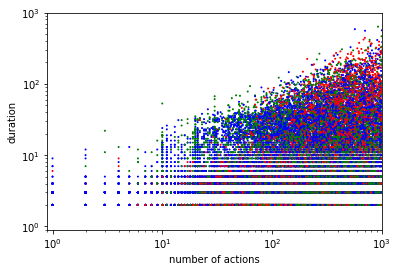

In [14]:
x = []
y = []
c = []
for t in tqdm(temp):
    dict = t
    x.append(dict['duration'])
    y.append(dict['number_of_action_with_numeric_reference']+dict['number_of_action_with_NON_numeric_reference'])
    if dict['clickout_equal_last_reference']:
        c.append('blue')
    else:
        if dict['clickout_in_reference']:
            c.append('red')
        else:
            c.append('green')
        

plt.xlabel('number of actions')
plt.ylabel('duration')
plt.xscale('log')
plt.yscale('log')
plt.xlim((0,1000))
plt.ylim((0,1000))

plt.scatter(x,y,c=c, s=1)

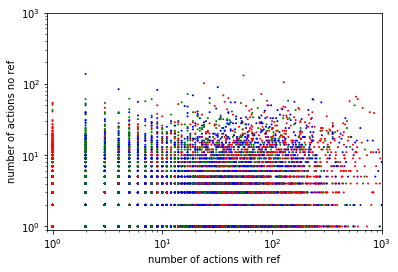

In [15]:
x = []
y = []
c = []
for t in temp:
    dict = t
    x.append(dict['number_of_action_with_numeric_reference'])
    y.append(dict['number_of_action_with_NON_numeric_reference'])
    if dict['clickout_equal_last_reference']:
        c.append('blue')
    else:
        if dict['clickout_in_reference']:
            c.append('red')
        else:
            c.append('green')
        
plt.xlabel('number of actions with ref')
plt.ylabel('number of actions no ref')
plt.xscale('log')
plt.yscale('log')
plt.xlim((0,1000))
plt.ylim((0,1000))
plt.scatter(x,y,c=c, s=1)